#**STEAM VIDEO GAMES RECOMMENDATION SYSTEM**

The aim of this project is to recommend the similar games to the user based on their behaviour

## **About dataset**

Th dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.



## **Columns in dataset**

1. user-id

2. game-title

3. behavior-name

4. value


In [217]:
# import all necessary libraries
import pandas as pd
import numpy as np
# import cosine similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Read csv file using pandas
data=pd.read_csv("/content/steam-200k.csv")
data

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [219]:
data.shape

(199999, 5)

In [220]:
df1=pd.DataFrame(pd.Series(data.columns)).T
df1.columns=["user_id" , "games", "status" , "hoursplay" , "0"]
df1

,user_id,games,status,hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0


In [221]:
df=data
df.columns=["user_id" , "games", "status" , "hoursplay" , "0"]
df


,user_id,games,status,hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [222]:
final=pd.concat([df1,df],axis=0 , ignore_index=True)
final

,user_id,games,status,hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [223]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    200000 non-null  object
 1   games      200000 non-null  object
 2   status     200000 non-null  object
 3   hoursplay  200000 non-null  object
 4   0          200000 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [224]:
final.describe()

,user_id,games,status,hoursplay,0
count,200000,200000,200000,200000.0,200000
unique,12394,5155,2,1594.0,2
top,62990992,Dota 2,purchase,1.0,0
freq,1573,9682,129511,130568.0,199999


In [225]:
final["0"].unique()

array(['0', 0], dtype=object)

In [226]:
final.isnull().sum()

user_id      0
games        0
status       0
hoursplay    0
0            0
dtype: int64

In [227]:
final["hoursplay"]=final["hoursplay"].astype(float)
final=final.drop(['0'],axis=1)

In [228]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    200000 non-null  object 
 1   games      200000 non-null  object 
 2   status     200000 non-null  object 
 3   hoursplay  200000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [229]:
final.describe()

,hoursplay
count,200000.000000
mean,17.874384
std,138.056952
min,0.100000
25%,1.000000
50%,1.000000
75%,1.300000
max,11754.000000


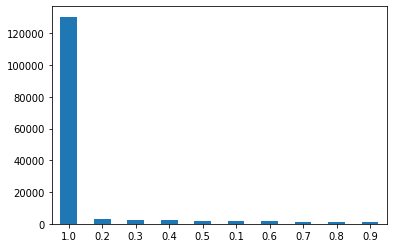

In [230]:
final["hoursplay"].value_counts().head(10).plot.bar(x='games', y='hoursplay', rot=0)

In [231]:
final["hoursplay"].nunique()

1593

In [232]:
final.duplicated().sum()

707

In [233]:
final[["user_id","games"]].duplicated().sum()

71195

In [234]:
#drop duplicate user_id and games keep the last one
final=final.drop_duplicates(subset=["user_id","games"], keep='last')

# **EDA**

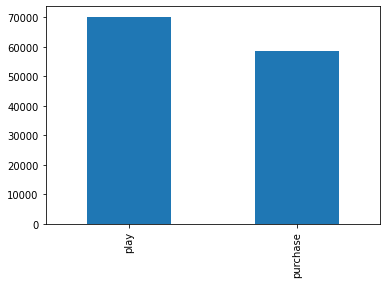

In [235]:
# get the total count of play and total count of purchase
final.status.value_counts().plot.bar()

# plot a boxplot of status as x-axis and hoursplay as y-axis


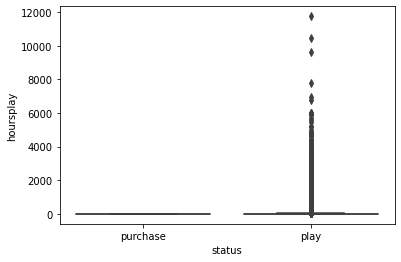

In [236]:
sns.boxplot(data =final, x="status",y="hoursplay")

In [237]:
# sns.histplot(x=final["hoursplay"])

(array([1.28334e+05, 3.40000e+02, 7.80000e+01, 3.00000e+01, 1.30000e+01,
        6.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.000000e-01, 1.175490e+03, 2.350880e+03, 3.526270e+03,
        4.701660e+03, 5.877050e+03, 7.052440e+03, 8.227830e+03,
        9.403220e+03, 1.057861e+04, 1.175400e+04]),
 <a list of 10 Patch objects>)

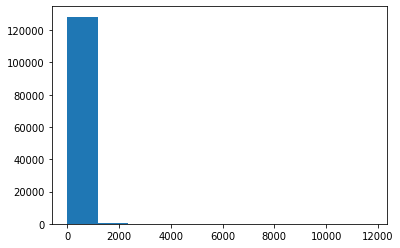

In [238]:
plt.hist(x=final["hoursplay"])

In [239]:
final.head()

,user_id,games,status,hoursplay
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1


# converting hours to rating

In [240]:
# convert the hoursplay into rating
final=final[(final["hoursplay"]>=2) & (final["status"]=="play")]
final_filtered=final[final.groupby("games").user_id.transform(len)>=20]
final_filtered["games"].nunique()
final_filtered.head()

final_filtered["user_id"] = final_filtered["user_id"].astype(str)
averages =final_filtered.groupby(["games"], as_index=False).hoursplay.mean()
averages["avg_Hoursplay"] = averages["hoursplay"] 
averages.drop(["hoursplay"] ,axis=1, inplace=True) 
averages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,games,avg_Hoursplay
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674
...,...,...
422,Worms Reloaded,12.600000
423,Worms Revolution,10.025000
424,XCOM Enemy Unknown,53.725175
425,Zombie Panic Source,88.833333


In [241]:
final_rating=pd.merge(final_filtered,averages[["games","avg_Hoursplay"]],on="games")
conditions=[(final_rating["hoursplay"]>=0.8*final_rating["avg_Hoursplay"]),(final_rating["hoursplay"]>=0.6*final_rating["avg_Hoursplay"]) & (final_rating["hoursplay"]<0.8*final_rating["avg_Hoursplay"]),(final_rating["hoursplay"]>=0.4*final_rating["avg_Hoursplay"]) & (final_rating["hoursplay"]<0.6*final_rating["avg_Hoursplay"]),(final_rating["hoursplay"]>=0.2*final_rating["avg_Hoursplay"]) & (final_rating["hoursplay"]<0.4*final_rating["avg_Hoursplay"]),(final_rating["hoursplay"]>=0)]

values=[5,4,3,2,1]
final_rating["rating"]=np.select(conditions,values)

final_rating

,user_id,games,status,hoursplay,avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [242]:
# keep only important columns( user_id, games,rating ) drop everthing else 
final_rating=final_rating[["user_id","games","rating"]]

In [243]:
final_rating

,user_id,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5
...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [244]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [245]:
# create pivot table containing user_id as index, games as columns, ratings as values
piv=final_rating.pivot_table(index=["user_id"],columns="games",values="rating")
piv

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
user_id,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99766416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99802512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99906508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
#check shape of pivot table
piv.shape

(8309, 427)

In [252]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table

piv_norm = piv.apply(lambda x: (x-np.mean(x))/ (np.max(x)-np.min(x)), axis=1)

# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True) 
piv_norm =piv_norm.T 
piv_norm

user_id,100053304,100057229,100070732,100096071,100168166,100208126,100267049,100311267,100322840,100351493,...,99701966,99704390,99711581,99713453,99723205,99766416,99802512,99906508,99940330,99992274
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Worms Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XCOM Enemy Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)] 

piv_norm

user_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Worms Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
XCOM Enemy Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


In [100]:
# import scipy, operator
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator


In [255]:
# convert the data into sparse matrix format to be read by the following functions
piv_sparse=sp.sparse.csr_matrix(piv_norm.values)

In [257]:
piv_sparse.shape

(427, 3056)

In [258]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity=cosine_similarity(piv_sparse)
user_similarity=cosine_similarity(piv_sparse.T)

In [264]:
# Inserting the similarity matricies into dataframe objects

item_sim_df=pd.DataFrame(item_similarity,index=piv_norm.index,columns=piv_norm.index)
#item similarity dataframe
user_sim_df=pd.DataFrame(user_similarity,index=piv_norm.columns,columns=piv_norm.columns)
#user similarity dataframe


In [266]:
# write a function which will return the top 10 games with the highest cosine similarity value
def top_game(game):
  count=1
  print(f"Similar games to {game} include :\n")
  for item in item_sim_df.sort_values(by=game,ascending=False).index[1:11]:
    print(f"No. {count} : {item}")
    count +=1





In [267]:
top_game("Fallout 4")

Similar games to Fallout 4 include :

No. 1 : Endless Legend
No. 2 : Middle-earth Shadow of Mordor
No. 3 : The Wolf Among Us
No. 4 : Divinity Original Sin
No. 5 : The Walking Dead
No. 6 : Papers, Please
No. 7 : The Witcher 3 Wild Hunt
No. 8 : Assassin's Creed Brotherhood
No. 9 : Project CARS
No. 10 : Resident Evil 5 / Biohazard 5


In [275]:
# write a function which will return the top 5 users with the highest similarity value 
def top_users(user):
  if user not in piv_norm.columns:
    return (f"No data available on user {user}")
  else:

    print("Most similar users:\n")

    sim_values=user_sim_df.sort_values(by=user,ascending=False).loc[:,user].tolist()[1:11]
    sim_users=user_sim_df.sort_values(by=user,ascending=False).index[1:11]

    zipped= zip(sim_users,sim_values,)
    for user,sim in zipped:
      print(f"User #{user}, Similarity value : {sim}")

In [276]:
top_users("100431715")

Most similar users:

User #109201849, Similarity value : 0.5965587590013043
User #35388317, Similarity value : 0.5773502691896258
User #143770130, Similarity value : 0.5604485383178048
User #40130306, Similarity value : 0.4999999999999999
User #13336286, Similarity value : 0.4999999999999999
User #36349097, Similarity value : 0.4999999999999999
User #15564408, Similarity value : 0.4999999999999999
User #40754921, Similarity value : 0.4999999999999999
User #80154824, Similarity value : 0.4999999999999999
User #33993318, Similarity value : 0.4999999999999999


In [281]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list

def similar_user_recs(user):
  if user not in piv_norm.columns:
    return(f"No data available on user {user}")
  else:

    sim_users=user_sim_df.sort_values(by=user,ascending=False).index[1:11]

    best=[]
    most_common={}

    for i in sim_users:
      max_score =piv_norm.loc[:,i].max()
      best.append(piv_norm[piv_norm.loc[:,i]==max_score].index.tolist())
    for i in range(len(best)):
      for j in best[i]:
        if j in most_common:
          most_common[j] +=1
        else :
          most_common[j] =1

    sorted_list=sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)

    return sorted_list[:5]

In [282]:
similar_user_recs("100431715")

[('Half-Life 2', 9), ('Portal', 1)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [283]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#make an object for the NearestNeighbors Class.
model_knn=NearestNeighbors(metric="cosine",algorithm="brute",n_neighbors=20,n_jobs=-1)
# fit the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [285]:
# choose random game
query_index=np.random.choice(piv_norm.shape[0])
# print the name of random game
print(f"Choosen game is ",piv_norm.index[query_index])

# use kNN algorithm to measures distance to determine the closeness of instances.
distance,indices=model_knn.kneighbors(piv_norm.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

# pick most popular games among the neighbors and print their names
for i in range(0,len(distance.flatten())):
  if i==0:
    print(f"Recommendation for {piv_norm.index[query_index]} :\n")
  else:
    print(f"{i} : {piv_norm.index[indices.flatten()[i]]} , with distance of {distance.flatten()[i]}")


Choosen game is  Poker Night at the Inventory
Recommendation for Poker Night at the Inventory :

1 : Bastion , with distance of 0.8763624234447299
2 : Defense Grid The Awakening , with distance of 0.8813410178715095
3 : Tom Clancy's Splinter Cell Conviction , with distance of 0.8944156218334125
4 : Tropico 4 , with distance of 0.8955848517799553
5 : Mass Effect 2 , with distance of 0.8956146799893283


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 

#Congratulation for completing the assignment.
You have learned a lot while doing this assignment.

